In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from function import COLOR

In [3]:
df = pd.read_csv("..\\..\\Export\\global500.csv")
df["country"] = df["city"].str[0:2]
df.set_index("city", inplace=True)
df


,ratioTrans_Baseline500,ratioTrans_PaR500,ratioTerminal_Baseline500,ratioTerminal_PaR500,ratioNormal_Baseline500,ratioNormal_PaR500,ratioAll_Baseline500,ratioAll_PaR500,ratioTrans500,ratioTerminal500,ratioNormal500,ratioAll500,country
city,,,,,,,,,,,,,
CN.AH.HF,0.002357,0.023729,0.000823,0.003390,0.008406,0.132203,0.011409,0.159322,0.039557,0.003956,0.142405,0.180380,CN
CN.AH.HZ,0.000000,0.000000,0.000116,0.063291,0.000464,0.012658,0.000580,0.075949,0.000000,0.010870,0.016304,0.027174,CN
CN.AH.WH,0.000242,0.000000,0.000522,0.000000,0.003963,0.210000,0.004467,0.210000,0.017045,0.007576,0.075758,0.081439,CN
CN.BJ.BJ,0.004587,0.060044,0.002243,0.031628,0.013211,0.128737,0.018726,0.199160,0.063364,0.020737,0.146313,0.216014,CN
CN.CQ.CQ,0.000415,0.075472,0.000228,0.036164,0.001822,0.133648,0.002354,0.213836,0.044512,0.020727,0.126741,0.177030,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
US.PA.MG,0.002916,0.015360,0.001206,0.005928,0.027213,0.139585,0.028016,0.142549,0.000000,0.000000,0.253589,0.253589,US
US.PA.PH,0.022145,0.074574,0.009457,0.009965,0.155385,0.320797,0.166655,0.341369,0.327160,0.037037,0.555556,0.604938,US
US.VA.AR,0.103987,0.160615,0.000000,0.000000,0.011359,0.001231,0.115346,0.164308,0.817391,0.000000,0.000000,0.817391,US


In [24]:
columns = ["All", "Normal", "Terminal", "Trans"]
diff = []
ratio = []
for i in columns:
    df[i+"diff"] = df["ratio"+i+"500"] - df["ratio"+i+"_Baseline500"]
    diff.append(i+"diff")
    ratio.append("ratio"+i+"500")
countryO = df[ratio + ["country"]].groupby(["country"]).mean()
country = df[diff + ["country"]].groupby(["country"]).mean()
country

,Alldiff,Normaldiff,Terminaldiff,Transdiff
country,,,,
CN,0.119675,0.090252,0.010738,0.025139
EU,0.127669,0.082879,0.019567,0.046593
US,0.205041,0.136165,0.018595,0.096688


In [25]:
countryO

,ratioAll500,ratioNormal500,ratioTerminal500,ratioTrans500
country,,,,
CN,0.135527,0.102205,0.013582,0.027877
EU,0.166641,0.109807,0.024299,0.059947
US,0.274224,0.185910,0.025942,0.120819


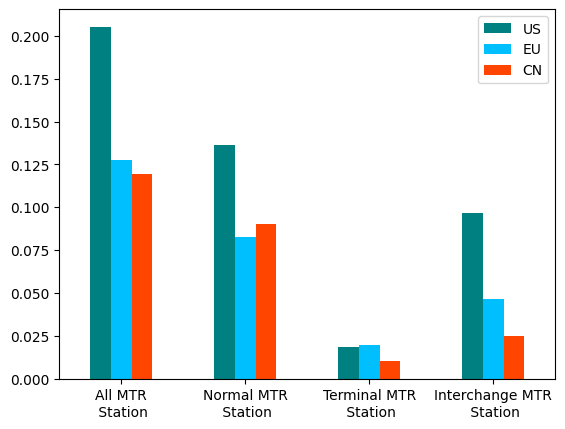

In [ ]:
country.sort_index(inplace=True, ascending=False)
p = country.T.plot.bar(color=COLOR)
p.set_xticklabels(["All MTR\n Station", "Normal MTR\n Station", "Terminal MTR\n Station", "Interchange MTR\n Station"], rotation=0)
plt.legend(title="")


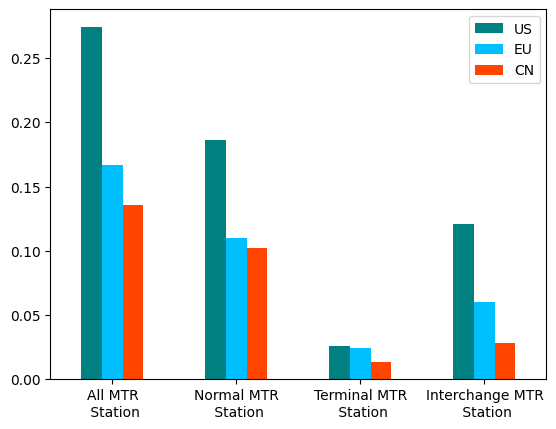

In [37]:
countryO.sort_index(inplace=True, ascending=False)
p = countryO.T.plot.bar(color=COLOR)
p.set_xticklabels(["All MTR\n Station", "Normal MTR\n Station", "Terminal MTR\n Station", "Interchange MTR\n Station"], rotation=0)
plt.legend(title="")

Cluster

In [113]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("..\\..\\Export\\global500.csv")
df2 = df[["city", "ratioAll500", "ratioNormal500", "ratioTrans500", "ratioTerminal500"]]
df = df[["ratioAll500", "ratioNormal500", "ratioTrans500", "ratioTerminal500"]]

In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_init="auto", n_clusters=5)
kmeans.fit(X_scaled)
# Get the cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_
df2["cluster"] = labels
df2["count"] = df2["cluster"].map(df2["cluster"].value_counts())
df2["country"] = df2["city"].str[0:2]
df2.to_csv("..\\..\\Export\\globalKmeans.csv", encoding="utf-8")

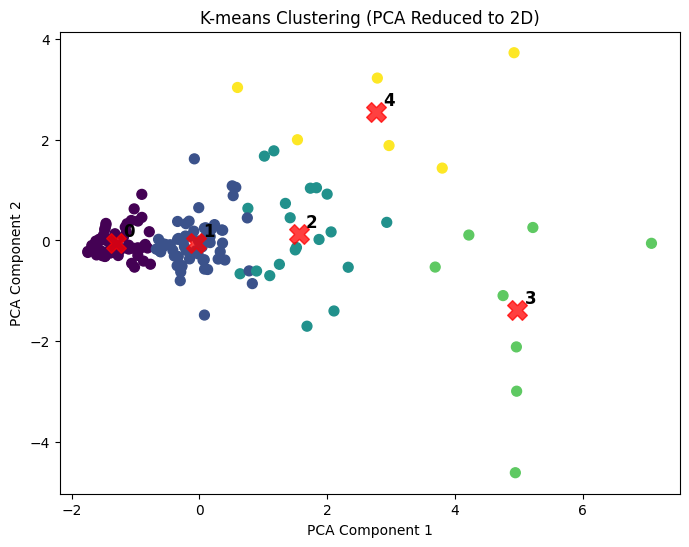

In [121]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(centers)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(pca.transform(centers)[:, 0], pca.transform(centers)[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Cluster centers
# Step 5: Annotate Cluster Centers
for i, center in enumerate(centers_pca):
    plt.annotate(f'{i}', xy=center, xytext=(5, 5), textcoords='offset points', 
                 fontsize=12, color='black', weight='bold')
plt.title("K-means Clustering (PCA Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [122]:
centers

array([[-0.80824913, -0.70495246, -0.53766199, -0.51931283],
       [ 0.0116268 , -0.03694498, -0.02376723, -0.06901686],
       [ 1.02379543,  1.10180682,  0.35596425,  0.55669071],
       [ 3.00908434,  2.66207787,  3.17460024,  0.7243006 ],
       [ 1.21500034,  0.78430824,  0.64299608,  3.49468771]])

In [31]:
import geopandas as gpd

In [36]:
dbFile=r"..\\EngCharger.gdb"
basemap = gpd.read_file(dbFile, layer="studyArea")

c:\Users\tengd\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts.  The processing may be really slow.  You can skip the processing by setting METHOD=SKIP.
  return ogr_read(


<GeoAxes: >

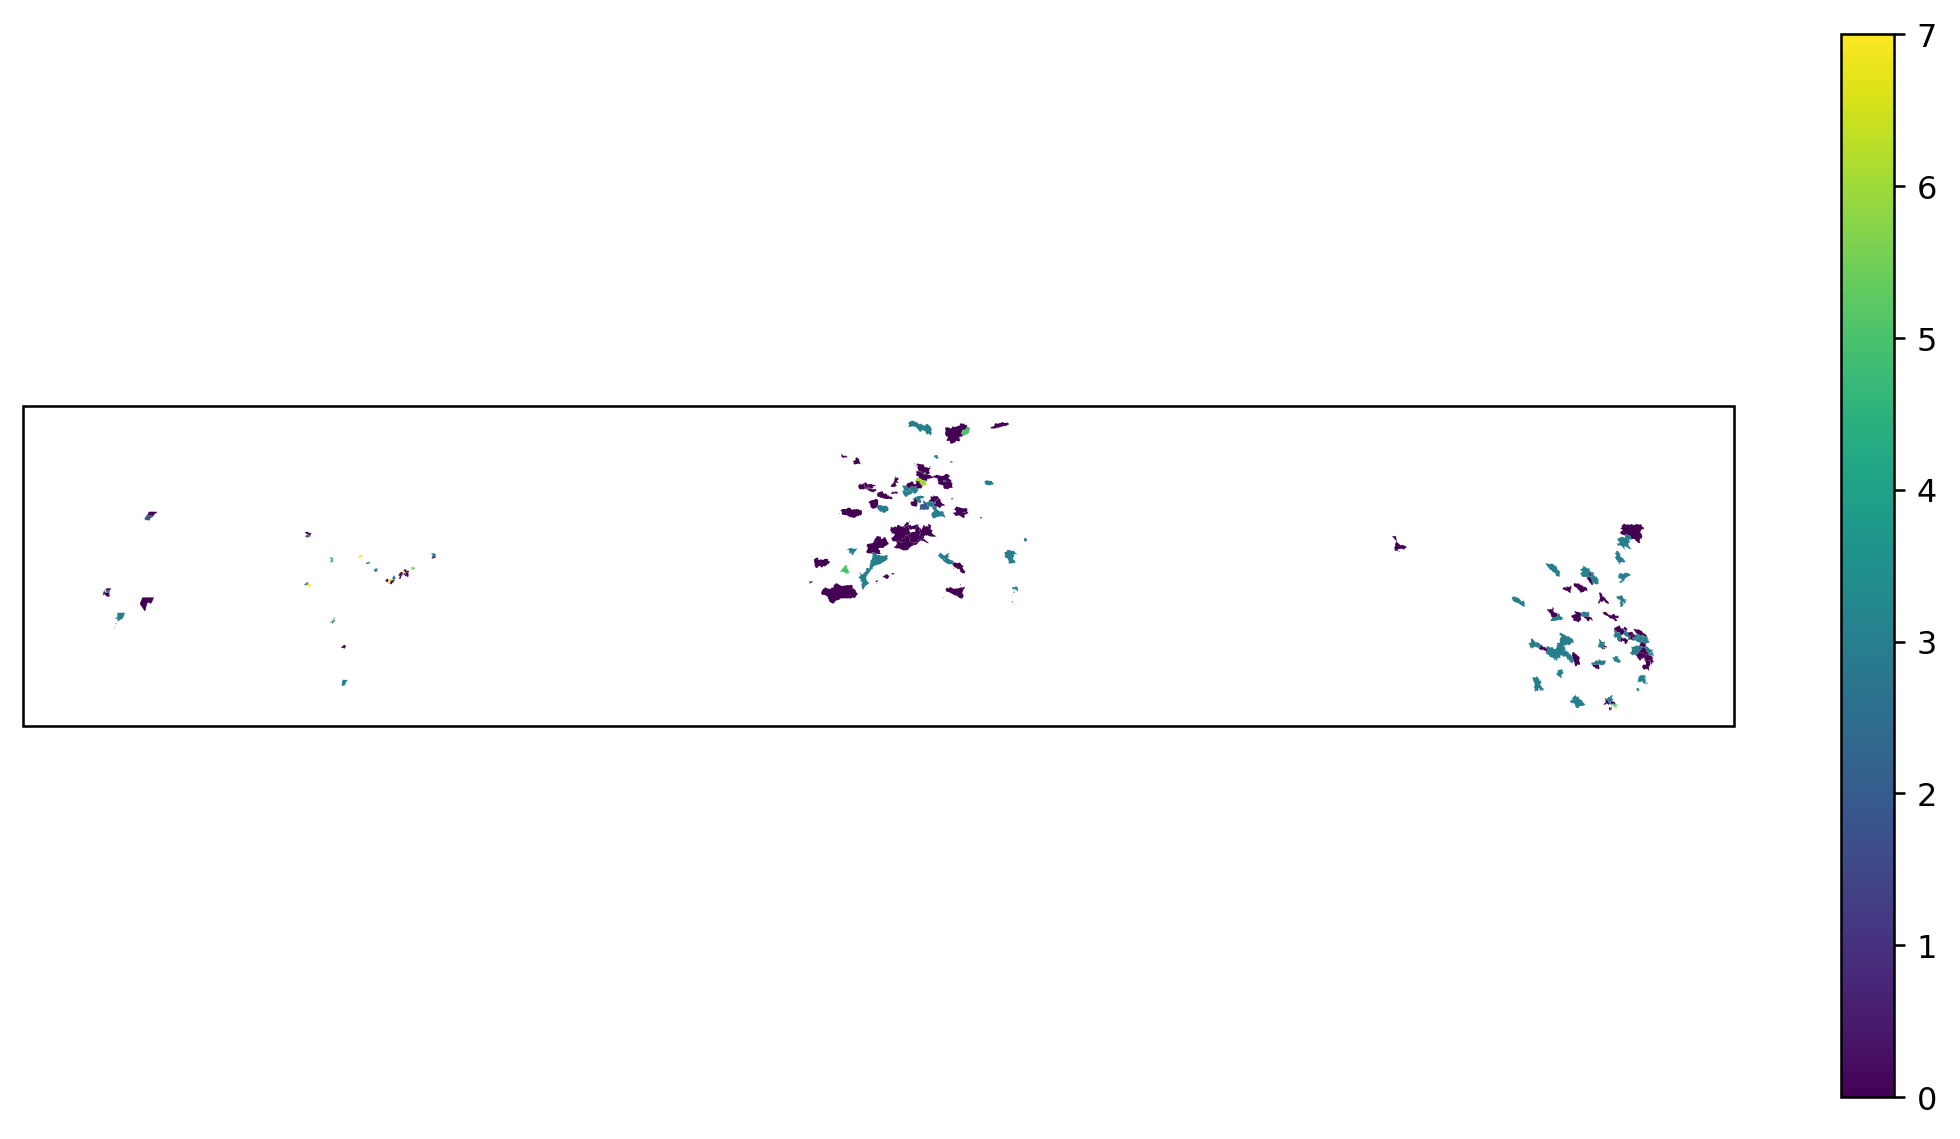

In [48]:
import cartopy.crs as ccrs

projection = ccrs.Robinson()
# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6),
                       dpi=230,
                       subplot_kw={'projection': projection})

mapresult = basemap.set_index("UID").join(df)
mapresult.to_crs(projection.proj4_init).plot(column="Cluster", ax=ax, legend=True)